# Load dataset


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('iris.data')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']  # add column names on original dataset
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# Divide data into features and labels

In [3]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

# Data visualization

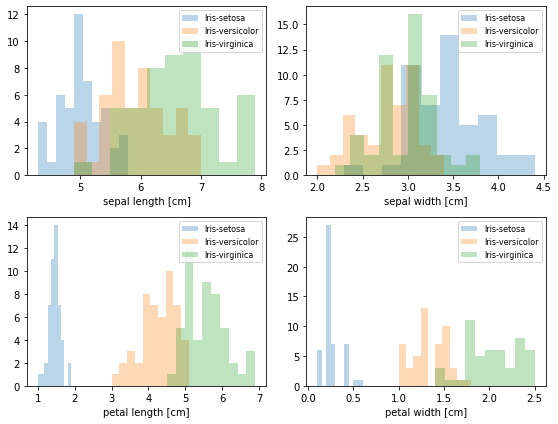

In [5]:
from matplotlib import pyplot as plt

# show labels
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

# show features
feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

# 指定绘图区域大小
plt.figure(figsize = (8, 6))
for cnt in range(4):
    # 这里用子图来呈现4个特征
    plt.subplot(2, 2, cnt+1)
    for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
        plt.hist(X[y==lab, cnt], label=lab, bins=10, alpha=0.3,)
    plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

plt.tight_layout()
plt.show()

# PCA
## Nomalize data

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Compute covariance matrix

In [8]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix: \n%s' %cov_mat)

Covariance matrix: 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [9]:
print('Covariance matrix computed with NumPy: \n%s' %np.cov(X_std.T))

Covariance matrix computed with NumPy: 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


## Compute eigenvector and eigenvalue

In [10]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvector: \n%s' %eig_vecs)
print('\nEigenvalue: \n%s' %eig_vals)

Eigenvector: 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalue: 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [13]:
# combine eigenvectors with eigenvalues correspondingly
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print (eig_pairs)
print ('\n----------\n')

# sorted eigenvalue with descending order
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Sorted eigenvalue with descending order: \n')
for i in eig_pairs:
    print(i[0])

[(2.9244283691111135, array([ 0.52308496, -0.25956935,  0.58184289,  0.56609604])), (0.9321523302535066, array([-0.36956962, -0.92681168, -0.01912775, -0.06381646])), (0.1494637348981336, array([-0.72154279,  0.2411952 ,  0.13962963,  0.63380158])), (0.02098259276427038, array([ 0.26301409, -0.12437342, -0.80099722,  0.52321917]))]

----------

Sorted eigenvalue with descending order: 

2.9244283691111135
0.9321523302535066
0.1494637348981336
0.02098259276427038


## Cummulative results

In [14]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print (var_exp)
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

[72.6200333269203, 23.14740685864414, 3.7115155645845284, 0.5210442498510098]


array([ 72.62003333,  95.76744019,  99.47895575, 100.        ])

In [15]:
# a = np.array([1,2,3,4])
# print (a)
# print (np.cumsum(a))

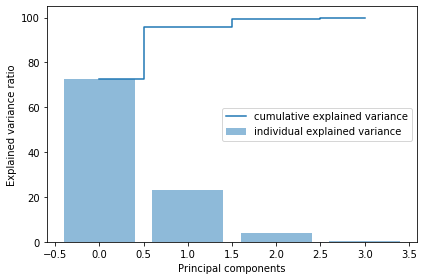

In [16]:
plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [18]:
Y = X_std.dot(matrix_w)
print(Y)

[[-2.10795032  0.64427554]
 [-2.38797131  0.30583307]
 [-2.32487909  0.56292316]
 [-2.40508635 -0.687591  ]
 [-2.08320351 -1.53025171]
 [-2.4636848  -0.08795413]
 [-2.25174963 -0.25964365]
 [-2.3645813   1.08255676]
 [-2.20946338  0.43707676]
 [-2.17862017 -1.08221046]
 [-2.34525657 -0.17122946]
 [-2.24590315  0.6974389 ]
 [-2.66214582  0.92447316]
 [-2.2050227  -1.90150522]
 [-2.25993023 -2.73492274]
 [-2.21591283 -1.52588897]
 [-2.20705382 -0.52623535]
 [-1.9077081  -1.4415791 ]
 [-2.35411558 -1.17088308]
 [-1.93202643 -0.44083479]
 [-2.21942518 -0.96477499]
 [-2.79116421 -0.50421849]
 [-1.83814105 -0.11729122]
 [-2.24572458 -0.17450151]
 [-1.97825353  0.59734172]
 [-2.06935091 -0.27755619]
 [-2.18514506 -0.56366755]
 [-2.15824269 -0.34805785]
 [-2.28843932  0.30256102]
 [-2.16501749  0.47232759]
 [-1.8491597  -0.45547527]
 [-2.62023392 -1.84237072]
 [-2.44885384 -2.1984673 ]
 [-2.20946338  0.43707676]
 [-2.23112223  0.17266644]
 [-2.06147331 -0.6957435 ]
 [-2.20946338  0.43707676]
 

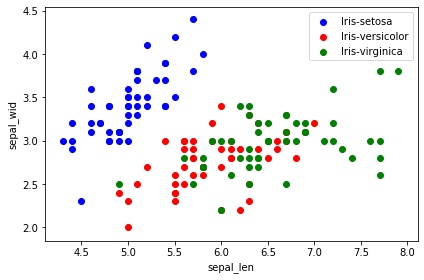

In [19]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(X[y==lab, 0],
                X[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

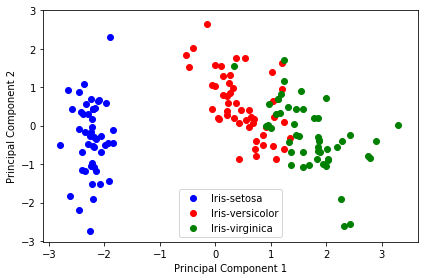

In [20]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()